In [61]:
import pyneuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
from typing import List, Any
np.random.seed(123)

In [62]:
class Data(nn.abstract.DataSource2D):
    _train_in : List[Any]
    _train_out : List[Any]

    def __init__(self):
        super().__init__()
        train_in, _ = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
        self._train_in = [np.reshape(x, (28,28,1)).astype(np.float32) for x in train_in]
        self._train_out = [np.reshape(x, (28,28,1)).astype(np.float32) for x in train_in]

    def size(self):
        return len(self._train_in)

    def sample(self, i : int):
        return (self._train_in[i], self._train_out[i])

In [63]:
N = 10
a = 0.000001

In [64]:
# model = nn.compound.Sequence(
#     nn.compound.UNet(1, 0.6, 0.9, 0.999, True),
#     nn.convolution.Conv2D(2, 1, 0.9, 0.999),
#     nn.convolution.Sigmoid2D()
# )
# model = nn.compound.Sequence(
#     nn.convolution.Conv2D(1,2,0.9,0.999),
#     nn.normalize.BatchRenorm2D(2,0.8,0.9,0.999),
#     nn.convolution.ReLU2D(),
#     nn.convolution.Conv2D(2,2,0.9,0.999),
#     nn.normalize.BatchRenorm2D(2,0.8,0.9,0.999),
#     nn.convolution.ReLU2D(),
#     nn.convolution.MaxPool2D()
# )
model = nn.compound.UNet(1, 0.8, 0.9, 0.999, True)
# model = nn.compound.Sequence(
#     nn.convolution.Conv2D(1,4,0.9,0.999),
#     nn.normalize.BatchRenorm2D(4,0.8,0.9,0.999),
#     nn.convolution.ReLU2D(),
#     nn.convolution.MaxPool2D()
# )
# model = nn.normalize.BatchRenorm2D(1,0.8,0.9,0.999)
data = Data()
loss = nn.loss.L2()
trainer = nn.training.Trainer2D(model, data, loss)

In [65]:
sample = data.sample(0)

In [66]:
sample[0].shape

(28, 28, 1)

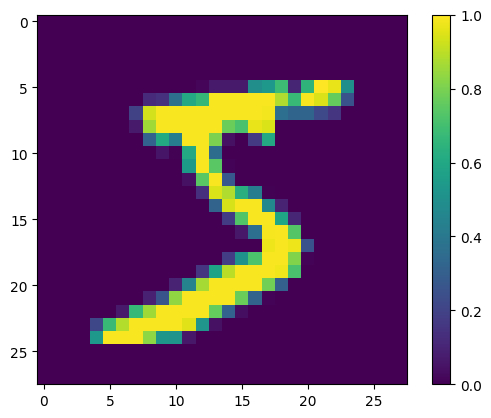

In [67]:
plt.imshow(sample[0])
plt.colorbar()

(28, 28, 1)

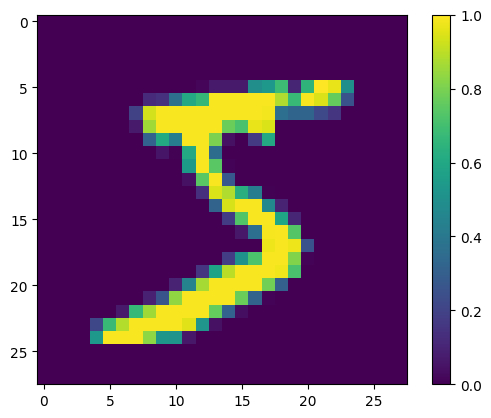

In [68]:
plt.imshow(sample[1])
plt.colorbar()
sample[1].shape

In [69]:
out = model.encode(sample[1])

(14, 14, 4)

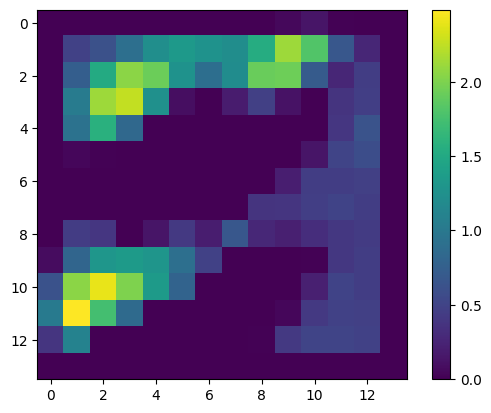

In [ ]:

plt.imshow(out[:,:,0])
plt.colorbar()
out.shape

In [ ]:
b = model.backward(out - (0.5*out))
plt.imshow(b)
b.shape

In [ ]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch, {duration * 1000 / (N * data.size())} milliseconds per sample.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()

In [ ]:
plt.imshow(sample[0])
plt.colorbar()

In [ ]:
out = model.forward(sample[0])
out.shape

In [ ]:
plt.imshow(out)
plt.colorbar()

In [ ]:
import pickle

bts = pickle.dumps(model)
sour_model = pickle.loads(bts)
out1 = model.forward(data.sample(0)[0])
out2 = sour_model.forward(data.sample(0)[0])
diff = abs(out1 - out2)
print(f"{np.min(diff)} - {np.mean(diff)} - {np.max(diff)}")